# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


c:\Users\Before\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## Part 2: Implement SVD for Dimensionality Reduction

In [29]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Center the data (subtract the mean)
    mean_X_train = np.mean(X_train, axis=0)
    X_train_centered = X_train - mean_X_train
    X_test_centered = X_test - mean_X_train  # Use the same mean from training for testing data
    
    # Step 2: Compute the covariance matrix
    covariance_matrix = np.dot(X_train_centered.T, X_train_centered) / X_train_centered.shape[0]
    
    # Step 3: Eigen decomposition of the covariance matrix
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
    
    # Step 4: Take the real part of the eigenvectors to avoid complex values
    eigenvectors = np.real(eigenvectors)
    
    # Step 5: Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort in descending order
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    # Step 6: Select the top 'n_components' eigenvectors (the principal components)
    selected_eigenvectors = eigenvectors[:, :n_components]
    
    # Step 7: Transform the training and test data
    X_train_reduced = np.dot(X_train_centered, selected_eigenvectors)
    X_test_reduced = np.dot(X_test_centered, selected_eigenvectors)
    
    # Return the reduced data and eigenvectors for visualization
    return X_train_reduced, X_test_reduced, eigenvectors


## Part 3: Train Logistic Regression and Measure Performance

In [30]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [27]:

# Ensure the results list is defined
results = []

# Experiment with different levels of SVD
svd_components = [10, 50, 100, 200, 300, 400, 500, 600, 700]

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply custom SVD to the training and test sets, getting three outputs
    X_train_svd, X_test_svd, eigenvectors = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and measure accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    results.append({
        'n_components': n_components,
        'accuracy': accuracy,
        'training_time': training_time
    })
    
    # Print the result for this number of components
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...
SVD components: 10, Accuracy: 0.8035, Training time: 0.4774 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9080, Training time: 6.1723 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 19.2447 seconds
Applying custom SVD with 200 components...
SVD components: 200, Accuracy: 0.9206, Training time: 41.0776 seconds
Applying custom SVD with 300 components...
SVD components: 300, Accuracy: 0.9206, Training time: 69.5863 seconds
Applying custom SVD with 400 components...
SVD components: 400, Accuracy: 0.9196, Training time: 119.6277 seconds
Applying custom SVD with 500 components...
SVD components: 500, Accuracy: 0.9205, Training time: 149.1553 seconds
Applying custom SVD with 600 components...
SVD components: 600, Accuracy: 0.9204, Training time: 191.6914 seconds
Applying custom SVD with 700 componen

## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


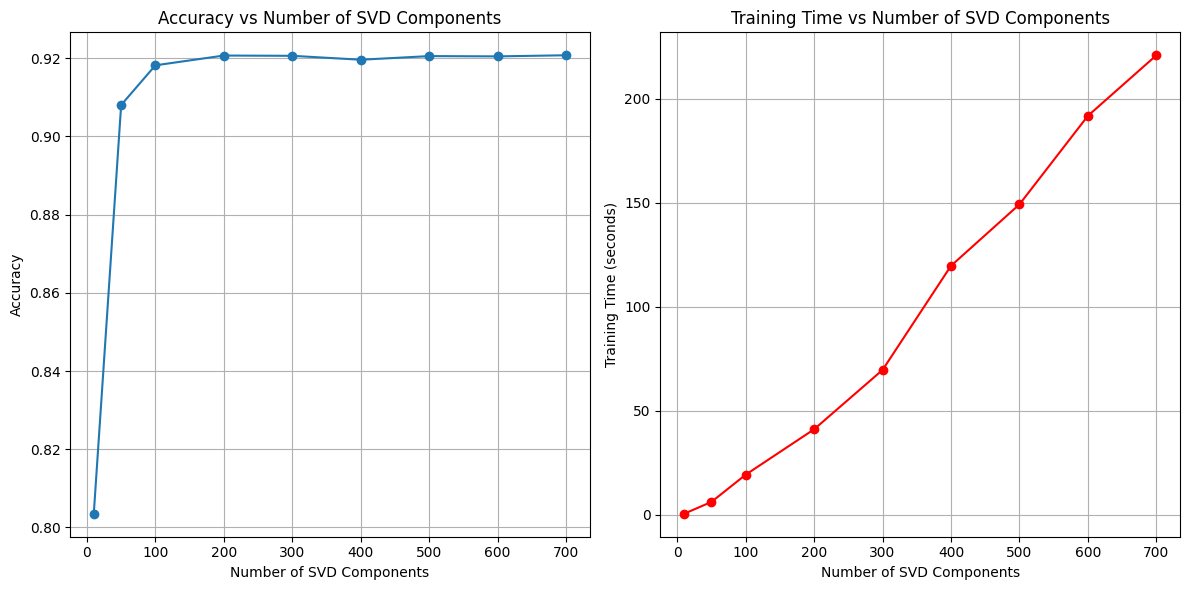

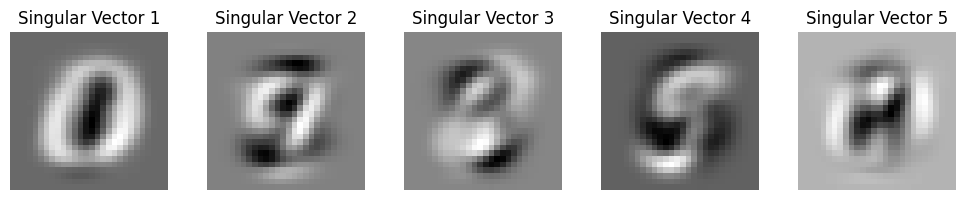

In [31]:
# Function to plot the accuracy and training time based on number of SVD components
def plot_svd_results(results):
    # Extract the number of components, accuracy, and training time
    n_components = [r['n_components'] for r in results]
    accuracy = [r['accuracy'] for r in results]
    training_time = [r['training_time'] for r in results]
    
    plt.figure(figsize=(12, 6))
    
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(n_components, accuracy, marker='o', label='Accuracy')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of SVD Components')
    plt.grid(True)

    # Plot training time
    plt.subplot(1, 2, 2)
    plt.plot(n_components, training_time, marker='o', color='r', label='Training Time')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Training Time (seconds)')
    plt.title('Training Time vs Number of SVD Components')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Plot the results
plot_svd_results(results)

# Function to visualize the top 5 singular vectors (reshape them to 28x28 images)
def visualize_singular_vectors(eigenvectors):
    plt.figure(figsize=(10, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.imshow(eigenvectors[:, i].reshape(28, 28), cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_singular_vectors(eigenvectors)

## Part 6: Analyze / Conclusion 

Based on the above graph, we can conclude that the accuracy increases significantly from 10 to around 50 components. This is likely due to the loss of important information in the lower component ranges, which leads to a drop in classification performance. Once we reach 100 components, more essential information is captured, resulting in a much better classification accuracy. As we can see from 100 components onward (up to 700, 0.918 vs 0.92), the accuracy remains around 0.92. This indicates that after reaching 100 components, the accuracy does not significantly improve further, suggesting that 100 components might be a threshold where most of the relevant information is retained.

While accuracy provides valuable insights into the model's performance, training time is also an important factor. The training time increases exponentially as the number of SVD components increases. This can be explained by the larger dataset the model has to train on, and the increase in the number of dimensions as more components are added. This is the main reason why the training time becomes significantly longer with higher numbers of components (in ascending order).

The first five singular vectors capture the dominant patterns in the MNIST dataset that are most useful for distinguishing between digits. These vectors reflect principal components of the data, which correspond to directions of maximum variance in pixel intensity. 
Using a smaller number of components (around 100 to 200) could maintin much of the critical information necessary for accurate classification, as these top singular vectors contain the most important features that distinguish different digits. This efficient compression allows the classifier to perform well even with reduced dimensionality.

In conclusion, based on the results and graph, one should aim to use around 100 to 200 components when training the model. This strategy offers excellent accuracy rates (around 0.92, which is very close to the accuracy obtained with 700 components) while keeping the training time within a reasonable range ( 19 seconds for 100 components vs. 200 seconds for 700 components). In addition, Singular vectors can tell that the most important digit features are captured with fewer components, which further supporting the choice of using 100 components for this task. 


